In [1]:
import random

PURITY = 0.3
SEGMENT = 10
MAP_PER_SEGMENT = 10000

In [66]:
def generate_normal():
    na = nb = 0
    depth = random.randint(20, 200)
    for _ in xrange(depth):
        if random.random() < 0.5:
            na += 1
        else:
            nb += 1
    if na > 2 * nb:
        nb = depth / 3
        na = depth - nb
    elif nb > 2 * na:
        na = depth / 3
        nb = depth - na
    return na, nb

In [76]:
def generate_tumor(purity):
    na = nb = 0
    depth = random.randint(20, 180)
    TYPES = ['A', 'B', 'AA', 'AB', 'BB', 'AAB', 'ABB', 'AABB']
    _type = random.choice(TYPES)
    if random.random() > purity:
        _type = 'AB'
    for _ in xrange(depth):
        if random.random() < 0.02:
            if random.random() > 0.5:
                na += 1
            else:
                nb += 1
        elif random.choice(_type) == 'A':
            na += 1
        else:
            nb += 1
    return na, nb

In [60]:
generate_normal()

(96, 86)

In [77]:
gNa = []
gNb = []
gTa30 = []
gTb30 = []
gTa60 = []
gTb60 = []
gTa90 = []
gTb90 = []

for _ in xrange(100000):
    gn = generate_normal()
    gNa.append(gn[0])
    gNb.append(gn[1])
    gt = generate_tumor(0.3)
    gTa30.append(gt[0])
    gTb30.append(gt[1])
    gt = generate_tumor(0.6)
    gTa60.append(gt[0])
    gTb60.append(gt[1])
    gt = generate_tumor(0.9)
    gTa90.append(gt[0])
    gTb90.append(gt[1])

In [36]:
header = ['#seg_idx', 'normal_A', 'normal_B', 'tumor_A', 'tumor_B']
with open('test.PyLOH.counts', 'w') as counts:
    counts.write('\t'.join(header) + '\n')
    for l, na, nb in zip(L, Na, Nb):
        counts.write('\t'.join([l, na, nb, na, nb]) + '\n')

In [35]:
L = []
Na = []
Nb = []
Ta = []
Tb = []

with open('from_aws/BASENAME.PyLOH.counts', 'r') as counts:
    counts.readline()
    for line in counts.readlines():
        c = line.strip().split('\t')
        L.append(c[0])
        Na.append(c[1])
        Nb.append(c[2])
        Ta.append(c[3])
        Tb.append(c[4])

In [12]:
len(Na)

167046

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

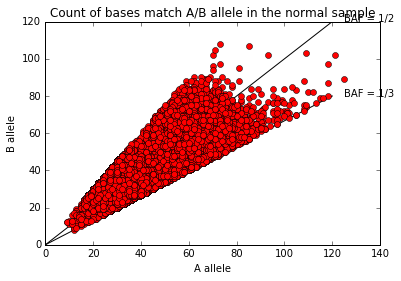

In [53]:
plt.xlabel('A allele')
plt.ylabel('B allele')
plt.title('Count of bases match A/B allele in the normal sample')
plt.plot([0, 120], [0, 120], 'black')
plt.text(125, 120, 'BAF = 1/2')
plt.plot([0, 120], [0, 80], 'black')
plt.text(125, 80, 'BAF = 1/3')
plt.plot(Na, Nb, 'ro')

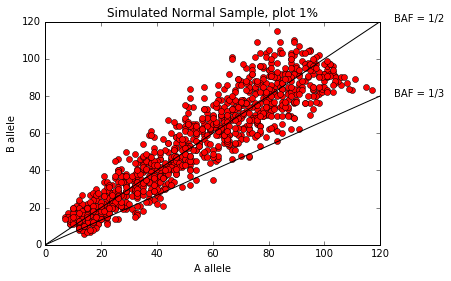

In [87]:
plt.xlabel('A allele')
plt.ylabel('B allele')
plt.title('Simulated Normal Sample, plot 1%')
plt.plot(gNa[::100], gNb[::100], 'ro')
plt.plot([0, 120], [0, 120], 'black')
plt.text(125, 120, 'BAF = 1/2')
plt.plot([0, 120], [0, 80], 'black')
plt.text(125, 80, 'BAF = 1/3')

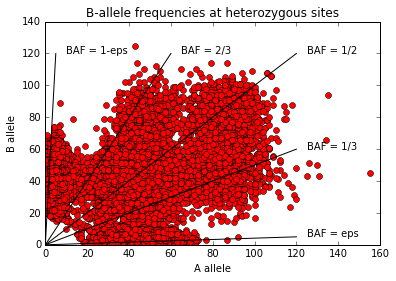

In [64]:
plt.xlabel('A allele')
plt.ylabel('B allele')
plt.title('B-allele frequencies at heterozygous sites')
plt.plot(Ta, Tb, 'ro')
plt.plot([0, 120], [0, 120], 'black')
plt.text(125, 120, 'BAF = 1/2')
plt.plot([0, 120], [0, 60], 'black')
plt.text(125, 60, 'BAF = 1/3')
plt.plot([0, 120], [0, 5], 'black')
plt.text(125, 5, 'BAF = eps')
plt.plot([0, 60], [0, 120], 'black')
plt.text(65, 120, 'BAF = 2/3')
plt.plot([0, 5], [0, 120], 'black')
plt.text(10, 120, 'BAF = 1-eps')

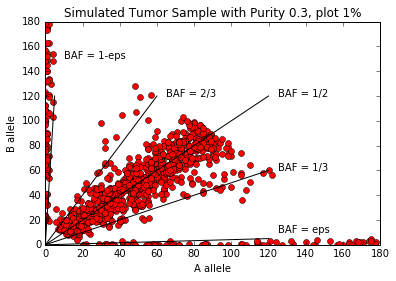

In [84]:
plt.xlabel('A allele')
plt.ylabel('B allele')
plt.title('Simulated Tumor Sample with Purity 0.3, plot 1%')
plt.plot(gTa30[::100], gTb30[::100], 'ro')
plt.plot([0, 120], [0, 120], 'black')
plt.text(125, 120, 'BAF = 1/2')
plt.plot([0, 120], [0, 60], 'black')
plt.text(125, 60, 'BAF = 1/3')
plt.plot([0, 120], [0, 5], 'black')
plt.text(125, 10, 'BAF = eps')
plt.plot([0, 60], [0, 120], 'black')
plt.text(65, 120, 'BAF = 2/3')
plt.plot([0, 5], [0, 120], 'black')
plt.text(10, 150, 'BAF = 1-eps')

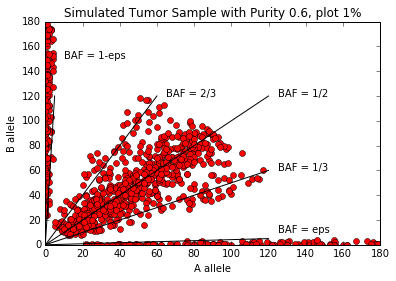

In [85]:
plt.xlabel('A allele')
plt.ylabel('B allele')
plt.title('Simulated Tumor Sample with Purity 0.6, plot 1%')
plt.plot(gTa60[::100], gTb60[::100], 'ro')
plt.plot([0, 120], [0, 120], 'black')
plt.text(125, 120, 'BAF = 1/2')
plt.plot([0, 120], [0, 60], 'black')
plt.text(125, 60, 'BAF = 1/3')
plt.plot([0, 120], [0, 5], 'black')
plt.text(125, 10, 'BAF = eps')
plt.plot([0, 60], [0, 120], 'black')
plt.text(65, 120, 'BAF = 2/3')
plt.plot([0, 5], [0, 120], 'black')
plt.text(10, 150, 'BAF = 1-eps')

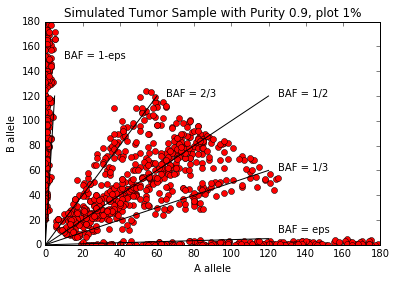

In [86]:
plt.xlabel('A allele')
plt.ylabel('B allele')
plt.title('Simulated Tumor Sample with Purity 0.9, plot 1%')
plt.plot(gTa90[::100], gTb90[::100], 'ro')
plt.plot([0, 120], [0, 120], 'black')
plt.text(125, 120, 'BAF = 1/2')
plt.plot([0, 120], [0, 60], 'black')
plt.text(125, 60, 'BAF = 1/3')
plt.plot([0, 120], [0, 5], 'black')
plt.text(125, 10, 'BAF = eps')
plt.plot([0, 60], [0, 120], 'black')
plt.text(65, 120, 'BAF = 2/3')
plt.plot([0, 5], [0, 120], 'black')
plt.text(10, 150, 'BAF = 1-eps')

In [ ]:
outfile.write('\t'.join(['#seg_name', 'chrom', 'start', 'end', 'normal_reads_num',
                                 'tumor_reads_num', 'LOH_frec', 'LOH_status', 'log2_ratio']) + '\n')

In [89]:
BAF_N_MIN = 0.4
BAF_N_MAX = 0.6
BAF_T_MIN = 0.35
BAF_T_MAX = 0.65
BAF_COUNTS_MIN = 10
BAF_COUNTS_MAX = 95
LOH_FREC_MAX = 0.25
LOH_FREC_MIN = 0.16

In [120]:
out90 = []
nnum = tnum = LOH_num = 0
for l, (na, nb, ta, tb) in enumerate(zip(gNa, gNb, gTa90, gTb90)):
    if (l + 1) % 10000 == 0:
        LOH_frec = LOH_num / 10000.0
        if LOH_frec < LOH_FREC_MIN:
            LOH_status = 'FALSE'
        elif LOH_frec >= LOH_FREC_MIN and LOH_frec < LOH_FREC_MAX:
            LOH_status = 'UNCERTAIN'
        elif LOH_frec >= LOH_FREC_MAX:
            LOH_status = 'TRUE'
        else:
            LOH_status = 'ERROR'
        out90.append([l-10000+1, l+1, nnum, tnum, LOH_frec, 'FALSE', (log(tnum) - log(nnum)) / log(2)])
        nnum = tnum = LOH_num = 0
    nnum += na + nb
    tnum += ta + tb
    baf = float(tb) / (ta + tb)
    if baf > BAF_T_MAX or baf < BAF_T_MIN:
        LOH_num += 1

In [121]:
out90

[[0, 10000, 1104323, 1000884, 0.5871, 'FALSE', -0.1418874241775448],
 [10000, 20000, 1106313, 994644, 0.5898, 'FALSE', -0.1535074550473538],
 [20000, 30000, 1093679, 999697, 0.5899, 'FALSE', -0.1296265652240568],
 [30000, 40000, 1098278, 994018, 0.5934, 'FALSE', -0.1438993986986185],
 [40000, 50000, 1109623, 996751, 0.5954, 'FALSE', -0.1547645441880268],
 [50000, 60000, 1103072, 996296, 0.5993, 'FALSE', -0.14688062551395742],
 [60000, 70000, 1093722, 1008314, 0.5948, 'FALSE', -0.11730110366914936],
 [70000, 80000, 1099839, 1000088, 0.5962, 'FALSE', -0.1371653986253359],
 [80000, 90000, 1103177, 994930, 0.5896, 'FALSE', -0.14899735264368172],
 [90000, 100000, 1093299, 995119, 0.5925, 'FALSE', -0.13574704538898125]]

In [94]:
from math import log

In [96]:
(log(23642945) - log(17981264)) / log(2)

0.39491531169416144

In [122]:
header = ['#seg_idx', 'normal_A', 'normal_B', 'tumor_A', 'tumor_B']
with open('test90.PyLOH.counts', 'w') as counts:
    counts.write('\t'.join(header) + '\n')
    for l, na, nb, ta, tb in zip(L, gNa, gNb, gTa90, gTb90):
        counts.write('\t'.join(map(str, [int(l) / 10000, na, nb, ta, tb])) + '\n')
with open('test90.PyLOH.segments', 'w') as outfile:
    outfile.write('\t'.join(['#seg_name', 'chrom', 'start', 'end', 'normal_reads_num',
                                 'tumor_reads_num', 'LOH_frec', 'LOH_status', 'log2_ratio']) + '\n')
    for l, line in enumerate(out90):
        outfile.write('chr1_' + str(l) + '\tchr1\t' + '\t'.join(map(str, line)) + '\n')